无约束极值问题
>简单的引用

$x_2$

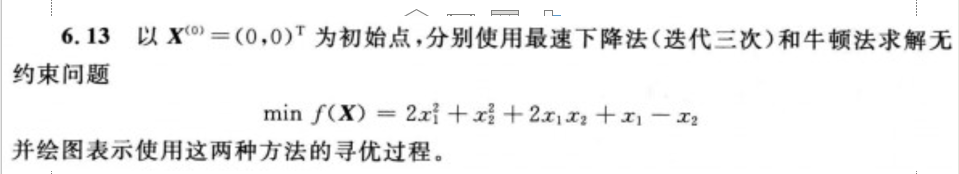

最速下降法

In [ ]:
x = [0, 0]
def reconstruct_function(dirction, x):
    # 根据不同的direction和lambda重构目标函数
    pass
    
def search_direction(x):
    # [4x1 + 2x2 +1, 2x2 + 2x1 -1]
    a = 4*x[0] + 2*x[1] + 1
    b = 2*x[1] + 2*x[0] - 1
    return [-a, -b]

def find_min_lambda():
    pass
num_epochs = 3
for epoch in range(num_epochs):
    direction = search_direction(x)
